In [ ]:
##########################################################################################
#                                                                                        #
#  888888b.  8888888 .d88888b.   .d8888b.     .d8888b.   .d8888b.      d8888      d8888  #
#  888  "88b   888  d88P" "Y88b d88P  Y88b   d88P  Y88b d88P  Y88b    d8P888     d8P888  #
#  888  .88P   888  888     888 Y88b.        888        888          d8P 888    d8P 888  #
#  8888888K.   888  888     888  "Y888b.     888d888b.  888d888b.   d8P  888   d8P  888  #
#  888  "Y88b  888  888     888     "Y88b.   888P "Y88b 888P "Y88b d88   888  d88   888  #
#  888    888  888  888     888       "888   888    888 888    888 8888888888 8888888888 #
#  888   d88P  888  Y88b. .d88P Y88b  d88P   Y88b  d88P Y88b  d88P       888        888  #
#  8888888P" 8888888 "Y88888P"   "Y8888P"     "Y8888P"   "Y8888P"        888        888  #
#                                                                                        # 
##########################################################################################
#
# Wrangle Synthetic Medical Record Data
#
##########################################################################################

## Fetch data

https://github.com/ishaghodgaonkar/emrbots/blob/master/100-Patients.zip

unzip it into the Data folder

In [2]:
import pandas as pd
import pylab as plt
import numpy as np
import datetime as dt

In [4]:
##################################################################################################################
#
# YouDo: Import each of the 4 files into its own data frame
#         (Hint:  they're tab-separated)
"C:\\Users\\vmain\\BIOS6644_GitHub\\BIOS6644_Spring_2024\\Modules\\Module_1\\data\\sugar_metabolomics.csv"
admiss_core = pd.read_csv("C:\\Users\\vmain\\BIOS6644_GitHub\\BIOS6644_Spring_2024\\Modules\\Module_1\\data\\100-Patients\\AdmissionsCorePopulatedTable.txt",sep="\t",index_col="PatientID")
admiss_diag_core = pd.read_csv("C:\\Users\\vmain\\BIOS6644_GitHub\\BIOS6644_Spring_2024\\Modules\\Module_1\\data\\100-Patients\\AdmissionsDiagnosesCorePopulatedTable.txt",sep="\t",index_col="PatientID")
patient_core = pd.read_csv("C:\\Users\\vmain\\BIOS6644_GitHub\\BIOS6644_Spring_2024\\Modules\\Module_1\\data\\100-Patients\\PatientCorePopulatedTable.txt",sep="\t",index_col="PatientID")
labs_core = pd.read_csv("C:\\Users\\vmain\\BIOS6644_GitHub\\BIOS6644_Spring_2024\\Modules\\Module_1\\data\\100-Patients\\LabsCorePopulatedTable.txt",sep="\t",index_col="PatientID")

In [31]:
# 1) 
#admiss_core 
#patient_core
#labs_core

#get variable types by column
admiss_types = admiss_core.dtypes
print(labs_core)

                                      AdmissionID  \
PatientID                                           
1A8791E3-A61C-455A-8DEE-763EB90C9B2C            1   
1A8791E3-A61C-455A-8DEE-763EB90C9B2C            1   
1A8791E3-A61C-455A-8DEE-763EB90C9B2C            1   
1A8791E3-A61C-455A-8DEE-763EB90C9B2C            1   
1A8791E3-A61C-455A-8DEE-763EB90C9B2C            1   
...                                           ...   
F0B53A2C-98CA-415D-B928-E3FD0E52B22A            6   
F0B53A2C-98CA-415D-B928-E3FD0E52B22A            6   
F0B53A2C-98CA-415D-B928-E3FD0E52B22A            6   
F0B53A2C-98CA-415D-B928-E3FD0E52B22A            6   
F0B53A2C-98CA-415D-B928-E3FD0E52B22A            6   

                                                          LabName  LabValue  \
PatientID                                                                     
1A8791E3-A61C-455A-8DEE-763EB90C9B2C  URINALYSIS: RED BLOOD CELLS       1.8   
1A8791E3-A61C-455A-8DEE-763EB90C9B2C           METABOLIC: GLUCOSE     103

In [6]:
# Dates!

In [34]:
# YouDo: Notice that there are many columns with dates, but pandas assumed they're strings
#
#        1) use the pd.to_datetime() method to transform all of the time columns to have type datetime
#            # stretch goal:  do it in a loop based on the string 'Date' appearing in the column name
#
# Show the type

#I used the second answer on this page to get at converting multiple columns to datetime

admiss_core[["AdmissionStartDate", "AdmissionEndDate"]] = admiss_core[["AdmissionStartDate", "AdmissionEndDate"]].apply(pd.to_datetime)


patient_core["PatientDateOfBirth"] = patient_core["PatientDateOfBirth"].apply(pd.to_datetime)

labs_core["LabDateTime"] = labs_core["LabDateTime"].apply(pd.to_datetime)


admisstype = admiss_core.dtypes

pattype = patient_core.dtypes

labtype = labs_core.dtypes

print(admisstype)

print(pattype)

print(labtype)




AdmissionID                    int64
AdmissionStartDate    datetime64[ns]
AdmissionEndDate      datetime64[ns]
dtype: object
PatientGender                                      object
PatientDateOfBirth                         datetime64[ns]
PatientRace                                        object
PatientMaritalStatus                               object
PatientLanguage                                    object
PatientPopulationPercentageBelowPoverty           float64
dtype: object
AdmissionID             int64
LabName                object
LabValue              float64
LabUnits               object
LabDateTime    datetime64[ns]
dtype: object


In [35]:
#wanted to check my work here by doing the same time difference equation you did

admiss_core.iloc[3]['AdmissionEndDate']-admiss_core.iloc[3]['AdmissionStartDate']

Timedelta('5 days 10:14:56.766000')

In [7]:
# As is typical in complex data sets, informtion about each patient is broken up into several different
# tables, cross-referenced by a patient id
##################################################################################################################
#
# YouDo: Print out the records from each of the four tables for patient number
# 7A025E77-7832-4F53-B9A7-09A3F98AC17E	
pid='7A025E77-7832-4F53-B9A7-09A3F98AC17E'
admiss_core.loc[admiss_core.index==pid]
#admiss_core


,AdmissionID,AdmissionStartDate,AdmissionEndDate
PatientID,,,
7A025E77-7832-4F53-B9A7-09A3F98AC17E,7,2011-10-12 14:55:02.027,2011-10-22 01:16:07.557
7A025E77-7832-4F53-B9A7-09A3F98AC17E,1,1978-06-29 07:29:11.593,1978-07-10 04:05:51.787
7A025E77-7832-4F53-B9A7-09A3F98AC17E,2,1982-10-14 07:01:43.613,1982-10-21 16:44:00.310
7A025E77-7832-4F53-B9A7-09A3F98AC17E,3,1990-02-23 04:28:34.457,1990-03-13 15:55:29.837
7A025E77-7832-4F53-B9A7-09A3F98AC17E,4,1994-05-15 11:34:00.840,1994-05-19 23:04:04.877
7A025E77-7832-4F53-B9A7-09A3F98AC17E,5,2001-01-10 11:04:58.943,2001-01-27 00:54:18.730
7A025E77-7832-4F53-B9A7-09A3F98AC17E,6,2001-12-29 20:28:01.050,2002-01-18 18:16:04.423


In [8]:
labs_core.loc[labs_core.index==pid]


,AdmissionID,LabName,LabValue,LabUnits,LabDateTime
PatientID,,,,,
7A025E77-7832-4F53-B9A7-09A3F98AC17E,1,METABOLIC: CARBON DIOXIDE,20.9,mmol/L,1978-06-29 22:56:25.430
7A025E77-7832-4F53-B9A7-09A3F98AC17E,1,METABOLIC: BILI TOTAL,0.3,mg/dL,1978-06-30 00:55:28.273
7A025E77-7832-4F53-B9A7-09A3F98AC17E,1,METABOLIC: CALCIUM,7.4,mg/dL,1978-06-30 07:11:48.760
7A025E77-7832-4F53-B9A7-09A3F98AC17E,1,CBC: NEUTROPHILS,2.8,k/cumm,1978-06-30 00:01:24.477
7A025E77-7832-4F53-B9A7-09A3F98AC17E,1,CBC: MCHC,32.2,g/dl,1978-06-30 04:33:20.790
...,...,...,...,...,...
7A025E77-7832-4F53-B9A7-09A3F98AC17E,7,METABOLIC: ALT/SGPT,65.9,U/L,2011-10-21 22:37:12.087
7A025E77-7832-4F53-B9A7-09A3F98AC17E,7,CBC: HEMOGLOBIN,11.6,gm/dl,2011-10-22 00:25:12.860
7A025E77-7832-4F53-B9A7-09A3F98AC17E,7,CBC: RDW,14.7,%,2011-10-21 21:29:42.703


In [9]:
# SQL-like joins
jdf =  patient_core.join(labs_core, how='left')


In [10]:
jdf.shape, patient_core.shape, labs_core.shape

((111483, 11), (100, 6), (111483, 5))

In [52]:
# Holy cow!  this patient has lots of lab results in her record
# This is synthetic data, so it's bound to have weird things.  Is that normal in this data?
##################################################################################################################
#
# You do:
#   1) Compute the average & standard deviation of number of labs per patient.
#         hint:  Consider pd.groupby()
#
#used this as my reference: https://pandas.pydata.org/docs/getting_started/intro_tutorials/06_calculate_statistics.html

labstats_pid = labs_core[["LabName"]].groupby("PatientID").count()

labsmean_sd = labstats_pid.agg(
    {
        "LabName": ["mean", "std"],
    }
)


print("Stats on Number of Labs per Patient")
#print(labstats_pid)
print(labsmean_sd)



#   2) Compute a list of each lab and how many orders for that lab are in the data frame
#    I had some trouble initially with getting groupby to recognize "LabName". In R, I think I'd just use as.factor, or something along those lines. I think I'm missing
#    something as far as why this approach below worked (just happy it did). Would I even need to group by at this point, or could I have just treated LabName as an 
#    string (basically treat the LabName column as distinct from the rest of the dataframe)? I lpayed with the idea a little but didn't check into how to get it to group.

LABel = labs_core["LabName"]

labstats_labname = labs_core[["LabValue"]].groupby(by = LABel).count()

#testing out not even looking at the rest of the dataframe
#test = LABel.count(by = unique)


print("Number of each lab")
print(labstats_labname)
#print(test)

Stats on Number of Labs per Patient
         LabName
mean  1114.83000
std    539.36152
Number of each lab
                               LabValue
LabName                                
CBC: ABSOLUTE LYMPHOCYTES          3162
CBC: ABSOLUTE NEUTROPHILS          3210
CBC: BASOPHILS                     3165
CBC: EOSINOPHILS                   3191
CBC: HEMATOCRIT                    3211
CBC: HEMOGLOBIN                    3193
CBC: LYMPHOCYTES                   3162
CBC: MCH                           3191
CBC: MCHC                          3202
CBC: MEAN CORPUSCULAR VOLUME       3175
CBC: MONOCYTES                     3129
CBC: NEUTROPHILS                   3224
CBC: PLATELET COUNT                3177
CBC: RDW                           3188
CBC: RED BLOOD CELL COUNT          3174
CBC: WHITE BLOOD CELL COUNT        3209
METABOLIC: ALBUMIN                 3202
METABOLIC: ALK PHOS                3154
METABOLIC: ALT/SGPT                3155
METABOLIC: ANION GAP               3166
METABOLIC: AST

Patient with the most lab combo: 80D356B4-F974-441F-A5F2-F95986D119A2CBC: HEMATOCRIT
Patient with most labs of any kind run 80D356B4-F974-441F-A5F2-F95986D119A2


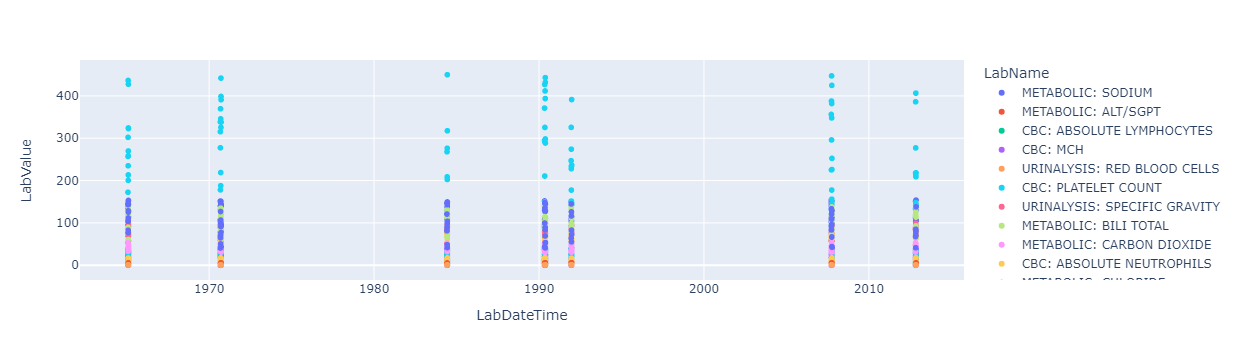

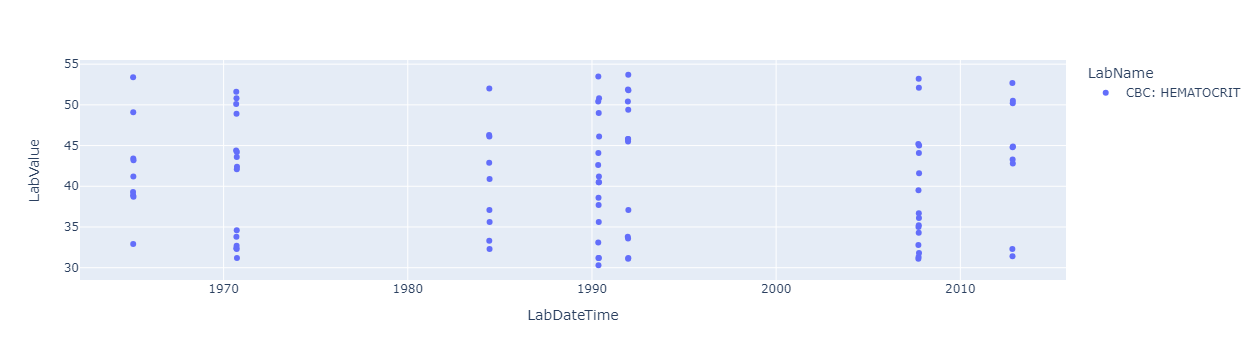

In [150]:
# It seems that this data set has the same patient getting the same labs perhaps dozens of times.
# Lets make a visualization of one of the time vs. one of the lab values for a specific patient.
##################################################################################################################
#
# You do:
#   1) Find the patient/lab combination with the most labs taken
#  my thought here was to concatenate labsnames and PID to get a new indicator, then find the most frequent observation in this new category
#  had to look up how to concatenate again: https://saturncloud.io/blog/how-to-combine-two-columns-in-a-pandas-dataframe/

#duplicating PatientID column because my code below refused to recognize its existence (index related?)
labs_core['pid'] = labs_core.index 

labs_core['Combined'] = labs_core['pid'] + labs_core['LabName']

#   could've used the approach I did above, but to try something new shamelessly stole this code from here: 
#   https://stackoverflow.com/questions/48590268/pandas-get-the-most-frequent-values-of-a-column

pt_lab = labs_core['Combined'].value_counts().idxmax()

#print(pt_lab)


#the way I read the question was: "what was the most frequently observed patient+lab?", so the patient starting with 80D356 had a hematocrit run more frequently
#than any other patient had any other lab run
pt_most_labs="Discover it!"

print(f"Patient with the most lab combo: {pt_lab}")

#to see which patient had the most labs (any kind of lab) run, I would do this:
pt_tot_lab = labs_core['pid'].value_counts().idxmax()

print(f"Patient with most labs of any kind run {pt_tot_lab}")



#   2) For the most-measured patient/lab combination, make a time vs lab-value plot
#    Hint:  you can "group by" multiple columns
#decided to create a subset using that combined column I created earlier: https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html

#hematocrit only for this patientID
busyptcombo_df = labs_core[labs_core["Combined"].isin(["80D356B4-F974-441F-A5F2-F95986D119A2CBC: HEMATOCRIT"])]


#all labs for this patient(didn't see any hematocrit on August 6, 1985 so figured you were looking for all labs)
busypt_df = labs_core[labs_core["pid"].isin(["80D356B4-F974-441F-A5F2-F95986D119A2"])]


#plotly via: https://plotly.com/python/line-and-scatter/

import plotly.express as px
#all labs
fig = px.scatter(busypt_df, x="LabDateTime", y="LabValue", color= "LabName")
fig.show()

#only hematocrit
fig = px.scatter(busyptcombo_df, x="LabDateTime", y="LabValue", color= "LabName")
fig.show()


#print(busyptcombo_df["LabDateTime"].to_string())


In [182]:
##################################################################################################################
#
# You do:
#   Closely inspect the plot you made.  
#
# 1) In order to compare this to another data set, your PI wants to know what the lab value was on August 6, 1985.  
#    What would you tell him/her (including all caveats)?

# Hover to discover, I used plotly :D

# There were no lab values taken on August 6th 1985, but to get the most proximate dates, I gave the below code a try,
# sourced from here: https://stackoverflow.com/questions/30112202/how-do-i-find-the-closest-values-in-a-pandas-series-to-an-input-number
# no dice, however.
# I would let them know there are no labs available on that date for this participant's hematocrit. Using the plot, we could readily scroll over to the nearest date with a value

#value = pd.DataFrame(data = ['1985-08-06 00:00:00.000'])

#busyptcombo_df = busyptcombo_df.assign(dateq = '1985-08-06 00:00:00.000')
#busyptcombo_df['dateq'] = pd.to_datetime(busyptcombo_df['dateq'])

#busyptcombo_df1 = pd.DataFrame(busyptcombo_df)
#print(busyptcombo_df)
#busyptcombo_df1['diff'] = [busyptcombo_df1['LabDateTime'] - busyptcombo_df1['dateq']]

#def find_neighbours(value, df, colname):
#    exactmatch = df[df[colname] == value]
#    if not exactmatch.empty:
#        return exactmatch.index
#    else:
#        lowerneighbour_ind = df[df[colname] < value][colname].idxmax()
#        upperneighbour_ind = df[df[colname] > value][colname].idxmin()
#        return [lowerneighbour_ind, upperneighbour_ind] 

#find_neighbours(value, busyptcombo_df, busyptcombo_df["LabDateTime"])
#find_neighbours(0, labs_core, labs_core["diff"])



# 2) How about the value for December 14, 1991?
#We still don't have these values, but the proximate values can be seen by hovering your cursor over the relevant timpoints
#to get summary values for nearby dates, I can do this (probably not what you're looking for):
# sourced from: https://saturncloud.io/blog/how-to-filter-pandas-dataframes-on-dates/#:~:text=Filtering%20Pandas%20DataFrames%20on%20Date%20Ranges&text=The%20df%5B'date'%5D%20%3C%3D%20'2020%2D01%2D,using%20element%2Dwise%20logical%20AND.


dec_values = busyptcombo_df.loc[(busyptcombo_df["LabDateTime"]>= '1991-12-13') & (busyptcombo_df['LabDateTime'] <= '1991-12-16')]
#filtered_df = df.loc[(df['date'] >= '2020-01-05') & (df['date'] <= '2020-01-08')]

HCT_dec = dec_values[["LabValue"]].describe()
#df = df[df['closing_price'].between(99, 101)]

#print(busyptcombo_df["LabDateTime"].to_string())
print(HCT_dec)

        LabValue
count   3.000000
mean   49.366667
std     3.178574
min    45.800000
25%    48.100000
50%    50.400000
75%    51.150000
max    51.900000
